In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
#importing raw data
raw_data = pd.read_csv('ufo.csv', low_memory=False)
#importing data to manipulate
df = pd.read_csv('ufo.csv', low_memory=False)

#low memory = False means it loads the whole csv file in at once to stop potentially
#skipping over some of the data

In [53]:
#checking data imported correctly
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [54]:
df.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.477778


In [6]:
### Possible business questions:

# Find out where ufo sightings are most common to see where there is the most interest/history there
# in UFOs to see where to open a 'History of UFOS' Museum/theme park.

# Find out if there is a decrease in UFO sightings over time to see if there 
# is still interest in UFOs

# explore shapes of UFO sightings to create branding.

# Gather interesting factual bites for advertisement EXAMPLE
# "There were over 500 UFO sightings in X area of the same ufo shape in 
#. X year"

#plot distributions for shape of UFO sightings in countries to see if 
#different countries have different distributions for shape 

#Hypothesis test - split shape into a one vs all( circle vs all the rest ) and do a hypothesis test to
#distributions on both


In [55]:
#checking shape, 80,332 rows and 11 columns
df.shape

(80332, 11)

In [56]:
#calling df.info to see NaN values and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [37]:
#here I tried to convert the duration (seconds) column top a float but
#we got an error
df['duration (seconds)'] = df['duration (seconds)'].astype(float)



ValueError: could not convert string to float: '2`'

In [57]:
#it seems there is a value 2` somewhere in our dataframe 
#stored in the duration column lets remove it and see if it's the only one
droprow = df['duration (seconds)'] == '2`'
df = df.drop(index=df[droprow].index)


In [42]:
df['duration (seconds)'] = df['duration (seconds)'].astype(float)

#nope.....there are more. I'll deal with null values and come back to this

ValueError: could not convert string to float: '8`'

In [58]:
#calculate the sum of the null values in each column
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1931
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [59]:
#identify unique objects in column 'shape'
df['shape'].unique()

array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

In [60]:
df['country'].unique()
#us United States
#gb Great Britain
#ca Canada
#au Australia
#de Germany

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [61]:
df['state'].unique()

array(['tx', nan, 'hi', 'tn', 'ct', 'al', 'fl', 'ca', 'nc', 'ny', 'ky',
       'mi', 'ma', 'ks', 'sc', 'wa', 'ab', 'co', 'nh', 'wi', 'me', 'ga',
       'pa', 'il', 'ar', 'on', 'mo', 'oh', 'in', 'az', 'mn', 'nv', 'nf',
       'ne', 'or', 'bc', 'ia', 'va', 'id', 'nm', 'nj', 'mb', 'wv', 'ok',
       'ri', 'nb', 'vt', 'la', 'pr', 'ak', 'ms', 'ut', 'md', 'mt', 'sk',
       'wy', 'sd', 'pq', 'ns', 'qc', 'de', 'nd', 'dc', 'nt', 'sa', 'yt',
       'yk', 'pe'], dtype=object)

In [62]:
# function to check for other hidden null values that are not NaN

def replace_hidden_values(df, columns_list):
    values_to_replace = ["?", "-", "_", " ", "  ", "   ", "n/a", "nan", "."]
    for col in columns_list:
        df[col] = df[col].replace(values_to_replace, np.nan)
    return df



In [63]:
#check NaN values again
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1931
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [64]:
#run our function
df = replace_hidden_values(df, list(df.columns))

In [65]:
#check NaN values again
df.isnull().sum()

# we can see here our function found 1 hidden null value in 'city' column
# and 1 in 'comments' these have been replaced with NaN

datetime                   0
city                       1
state                   5797
country                 9670
shape                   1931
duration (seconds)         0
duration (hours/min)       0
comments                  16
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [66]:
#replacing NaN values in state column with 'unknown_state'
df['state'] = df['state'].fillna('unknown_state')

In [67]:
#replacing NaN values in city column with 'unknown_city'
df['city'] = df['city'].fillna('unknown_city')

In [68]:
#replacing NaN values in country column with 'unknown_country'
df['country'] = df['country'].fillna('unknown_country')

In [69]:
#replacing NaN values in shape column with 'other'
df['shape'] = df['shape'].fillna('other')

In [70]:
#replacing NaN values in comments column with 'no_comment'
df['comments'] = df['comments'].fillna('no_comment')

In [71]:
#check NaN values again
df.isnull().sum()

#we can see here all the null values have been replaced

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

In [44]:
#Import re which helped me find those pesky non numerical values in
#my duration(seconds) column

import re

non_numeric_values = df[~df['duration (seconds)'].astype(str).str.match(r'^-?\d+\.?\d*$')]
print(non_numeric_values)

              datetime               city          state          country  \
35692  4/10/2005 22:52         santa cruz             ca               us   
41201  5/10/2001 22:30  ghaziabad (india)  unknown_state  unknown_country   
58591  7/21/2006 13:00  ibague (colombia)  unknown_state  unknown_country   

        shape duration (seconds) duration (hours/min)  \
35692   other                 8`        eight seconds   
41201   other          2631600               1  month   
58591  circle               0.5`          1/2 segundo   

                                                comments date posted  \
35692  2 red lights moving together and apart with a ...   4/16/2005   
41201  MASKED  THAT SCTRACHED &amp;HIT&#44   FLY HIGH...    8/5/2001   
58591  Viajaba a 27.000 pies en un avion comercial ve...  10/30/2006   

         latitude  longitude   
35692  36.9741667 -122.029722  
41201   28.669157   77.453758  
58591    4.440663  -75.244141  


In [47]:
#drop the rows with the non numericals

droprow2 = df['duration (seconds)'] == '8`'
df = df.drop(index=df[droprow2].index)

droprow3 = df['duration (seconds)'] == '2631600  '
df = df.drop(index=df[droprow3].index)

droprow4 = df['duration (seconds)'] == '0.5`'
df = df.drop(index=df[droprow4].index)

In [48]:
#converting to a float worked this time!
df['duration (seconds)'] = df['duration (seconds)'].astype(float)

In [49]:
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)      float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

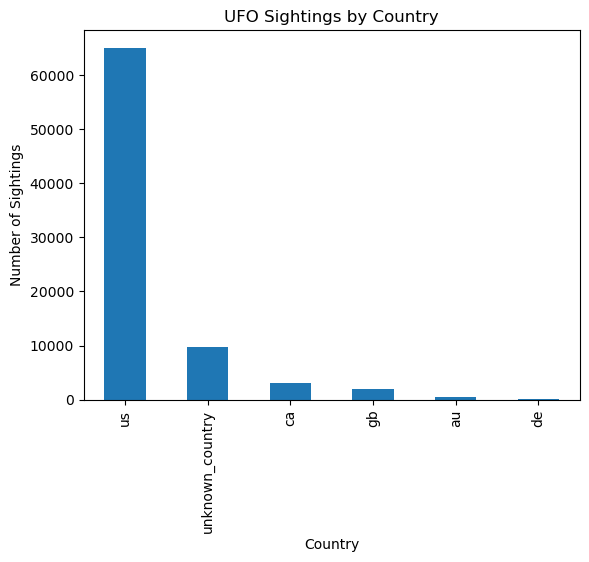

In [26]:
#here we plot the number of sightings per country to see where most of 
#our data is from.

country_counts = df['country'].value_counts()

country_counts.plot(kind='bar')
plt.title('UFO Sightings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.show()

#concluding that an overwhelming majority is in the united states

In [29]:
#now filtering the dataframe to only include the data from the US
us_df = df[df['country'] == 'us']

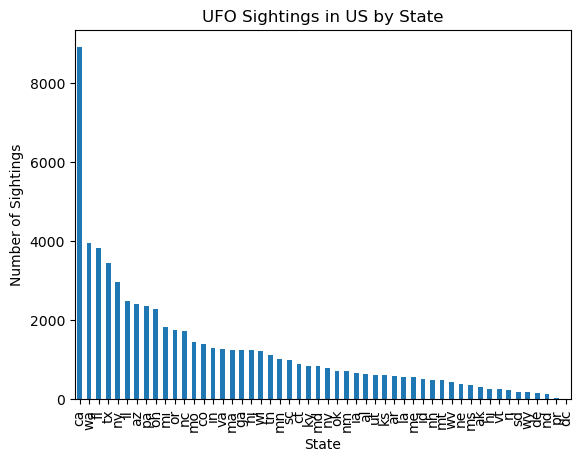

In [30]:


#now we plot the states in the US vs number of sightings

state_counts = us_df['state'].value_counts()


state_counts.plot(kind='bar')
plt.title('UFO Sightings in US by State')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.show()

#this is a bit messy and unreadable lets try to fix it

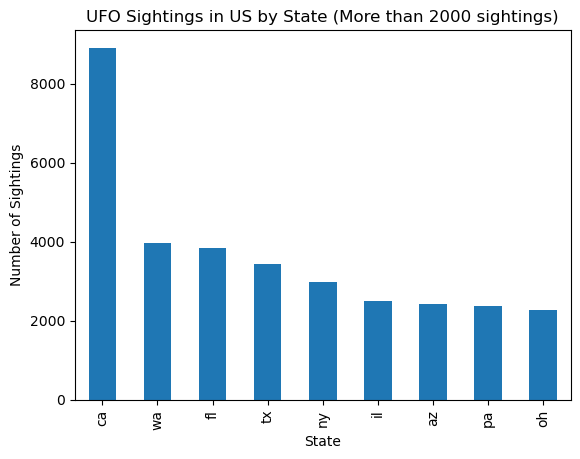

In [31]:
#same as above but adding a condition so only states with 2000 sightings 
#or more are included
state_counts = us_df['state'].value_counts()
state_counts = state_counts[state_counts > 2000]

state_counts.plot(kind='bar')
plt.title('UFO Sightings in US by State (More than 2000 sightings)')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.show()

#we can see that California has the most sightings

In [32]:
#an easier way to code it here:

us_df = df[df['country'] == 'us']
state_counts = us_df['state'].value_counts()
max_state = state_counts.index[0]
print('State with most sightings:', max_state)

State with most sightings: ca


ValueError: No variables found for grid columns.

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_96623/555732312.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')


Text(0.5, 1.0, 'UFO shape frequency')

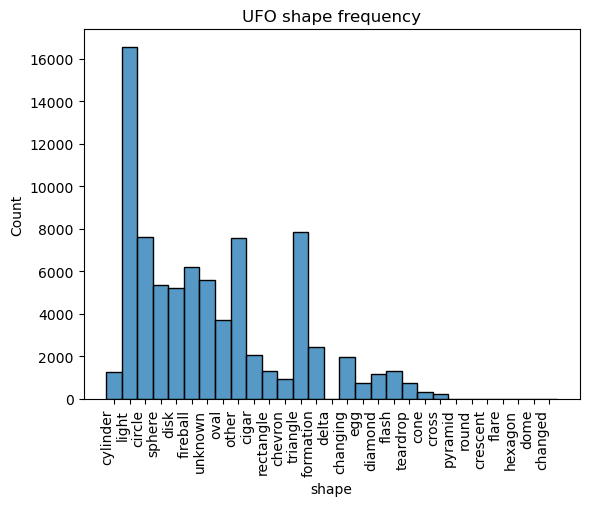

In [149]:
ax = sns.histplot(data = df, x = 'shape')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
ax.set_title('UFO shape frequency')

In [150]:
df['shape'].value_counts()

light        16565
triangle      7865
circle        7608
other         7581
fireball      6208
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: shape, dtype: int64

In [151]:
df['country'].unique()
#us United States
#gb Great Britain
#ca Canada
#au Australia
#de Germany

array(['us', 'unknown_country', 'gb', 'ca', 'au', 'de'], dtype=object)

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_96623/2765739401.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'UFO shape frequency in USA')

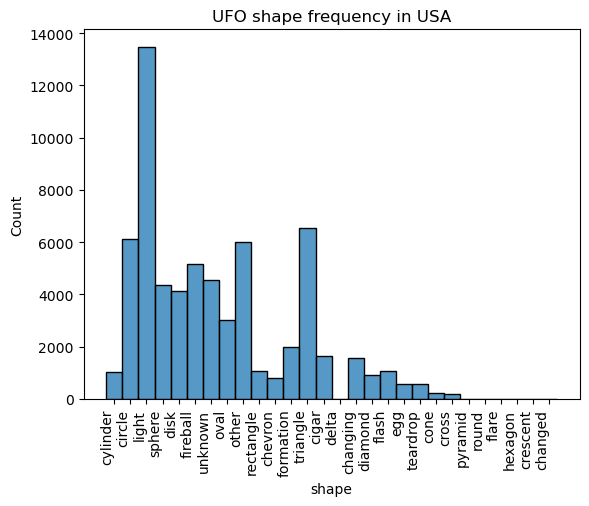

In [153]:
ax = sns.histplot(data=df[df['country'] == 'us'], x='shape')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title('UFO shape frequency in USA')


/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_96623/3598839005.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'UFO shape frequency in Great Britain')

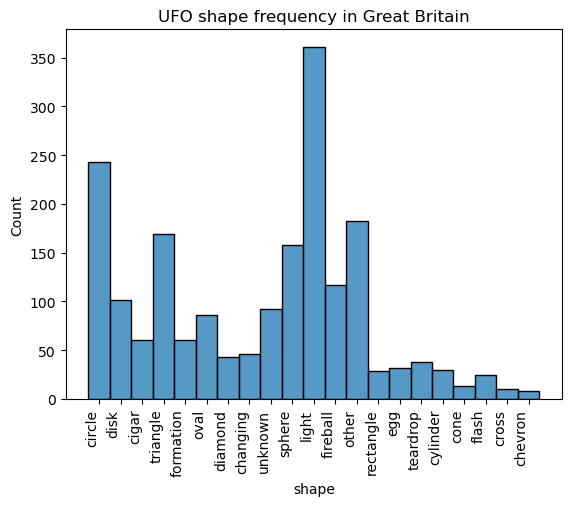

In [118]:
ax = sns.histplot(data=df[df['country'] == 'gb'], x='shape')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title('UFO shape frequency in Great Britain')

/var/folders/16/cjdm0db91wgbsrjn79p4gn7w0000gn/T/ipykernel_96623/620016100.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'UFO shape frequency in Canada')

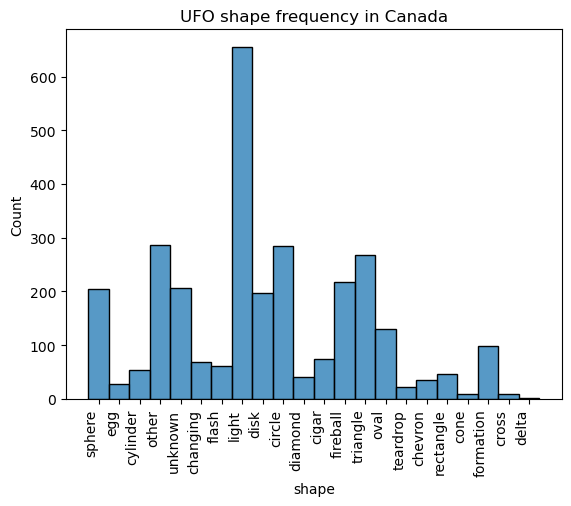

In [119]:
ax = sns.histplot(data=df[df['country'] == 'ca'], x='shape')b
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title('UFO shape frequency in Canada')

In [76]:
df.head(20)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,unknown_country,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),unknown_state,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),unknown_state,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


In [81]:
df.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
dtype: object

In [75]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')
df.dtypes


ValueError: time data '10/11/2006 24:00' does not match format '%d/%m/%Y %H:%M' (match)

In [77]:
df['datetime'] = df['datetime'].str.replace('24:00', '00:00')


In [79]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')
df.dtypes


datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
dtype: object

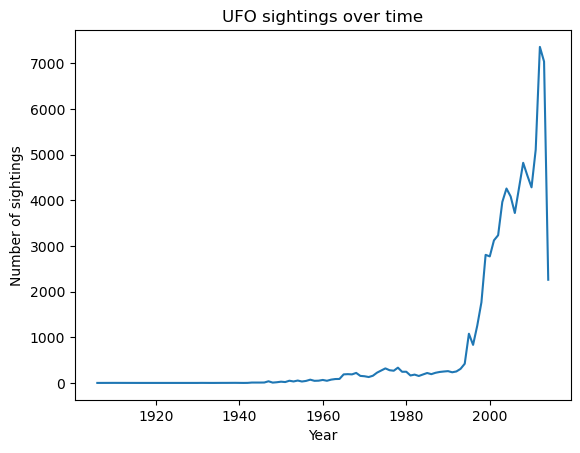

In [80]:
sightings_by_year = df.groupby(df['datetime'].dt.year)['datetime'].count()

plt.plot(sightings_by_year.index, sightings_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings over time')
plt.show()